In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("/home/sathish/Documents/Admission_Chance.csv")
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df1=pd.DataFrame(df)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [10]:
y=df1['Chance of Admit ']
x=df1.drop(['Serial No','Chance of Admit '],axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=3,random_state=42)

In [13]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [14]:
dtr.score(x_train,y_train)

0.7690147007980774

In [15]:
from sklearn.model_selection import cross_validate
cross_validate(dtr,x_train,y_train,cv=5)

{'fit_time': array([0.00539494, 0.00482535, 0.00413966, 0.00454402, 0.00425005]),
 'score_time': array([0.00330281, 0.00323248, 0.00331068, 0.00290918, 0.0049746 ]),
 'test_score': array([0.65709537, 0.56637936, 0.69815497, 0.68550483, 0.75949792])}

In [16]:
dtr.score(x_test,y_test)

0.773937978554051

## model validation stage

In [17]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [38]:
param={'model__max_depth' :[2,3,4,5,6,7,8,9,10],
       'model__criterion' :['squared_error','absolute_error'],
       'model__random_state':[42]}

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('model', dtr)])

In [41]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipeline,param,cv=5)

In [42]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=42))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [42]})

In [43]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=42))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [42]})

In [44]:
grid.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 4,
 'model__random_state': 42}

In [46]:
best=grid.best_estimator_

In [47]:
best.fit(x_train,y_train)

Pipeline(steps=[('model', DecisionTreeRegressor(max_depth=4, random_state=42))])

In [48]:
y_pred=best.predict(x_test)

In [50]:
from sklearn.metrics import mean_absolute_error, r2_score

In [51]:
mean_absolute_error(y_test,y_pred)

0.05455187822801758

In [52]:
r2_score(y_test,y_pred)

0.7921210170415511

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

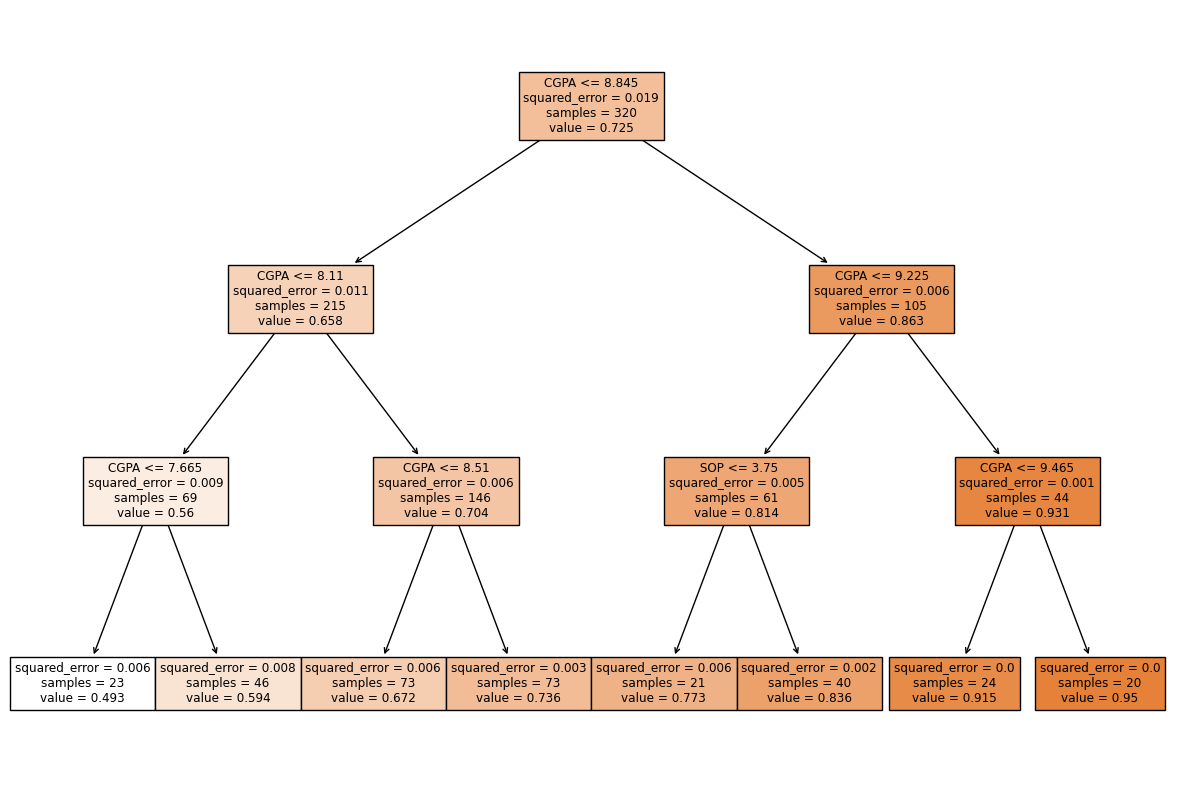

In [58]:
fig,ax=plt.subplots(figsize=(15,10))
final=DecisionTreeRegressor(max_depth=3,random_state=42)
final.fit(x_train,y_train)
plot_tree(final,feature_names=x.columns,filled=True);